In [1]:
#import basic liebries:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv('/home/juliana/Documents/_personal_project/customer_segmentation/Data/customer_data.csv',
                         index_col=0)
customer_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0,Low,1,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8,Average,4,Cat_6
2,458996,Female,Yes,69,No,Artist,0,Low,1,Cat_6
3,459000,Male,Yes,59,No,Executive,11,High,2,Cat_6
4,459001,Female,No,19,No,Marketing,2,Low,4,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0,Low,7,Cat_1
8064,464685,Male,No,35,No,Executive,3,Low,4,Cat_4
8065,465406,Female,No,33,Yes,Healthcare,1,Low,1,Cat_6
8066,467299,Female,No,27,Yes,Healthcare,1,Low,4,Cat_6


## Encoding

In [3]:
customer_df.head(9)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0,Low,1,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8,Average,4,Cat_6
2,458996,Female,Yes,69,No,Artist,0,Low,1,Cat_6
3,459000,Male,Yes,59,No,Executive,11,High,2,Cat_6
4,459001,Female,No,19,No,Marketing,2,Low,4,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0,High,5,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5,Low,3,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1,Average,3,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2,Average,4,Cat_6


In [4]:
#Ordial encoding:
## Create a dictionary:
dict_spending_score = dict(Low= 0, Average= 1, High= 2)
dict_gender = dict(Female= 1, Male=0)
dict_married_graduated = dict(Yes=1, No=0)
## Replace the categories by the rating:
customer_df['Spending_Score'] = customer_df.Spending_Score.map(dict_spending_score)
customer_df['Gender'] = customer_df.Gender.map(dict_gender)
customer_df['Ever_Married'] = customer_df.Ever_Married.map(dict_married_graduated)
customer_df['Graduated'] = customer_df.Graduated.map(dict_married_graduated)
## Check the output:
customer_df.head(6)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,1,1,36,1,Engineer,0,0,1,Cat_6
1,458994,0,1,37,1,Healthcare,8,1,4,Cat_6
2,458996,1,1,69,0,Artist,0,0,1,Cat_6
3,459000,0,1,59,0,Executive,11,2,2,Cat_6
4,459001,1,0,19,0,Marketing,2,0,4,Cat_6
5,459003,0,1,47,1,Doctor,0,2,5,Cat_4


## Clustering: Unsupervised Machine Learning Model

In [5]:
# import required libraries for clustering

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#select the variables to segment the customers:
select_data = customer_df.drop(['ID', 'Profession','Var_1'], axis=1)
select_data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,1,1,36,1,0,0,1
1,0,1,37,1,8,1,4
2,1,1,69,0,0,0,1
3,0,1,59,0,11,2,2
4,1,0,19,0,2,0,4
...,...,...,...,...,...,...,...
8063,0,0,22,0,0,0,7
8064,0,0,35,0,3,0,4
8065,1,0,33,1,1,0,1
8066,1,0,27,1,1,0,4


## Scale the Data

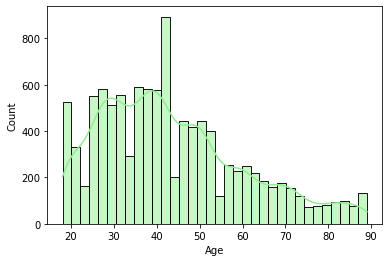

In [7]:
#Check the Age distribution
sns.histplot(select_data.Age, label = 'Age', color='lightgreen', kde=True);

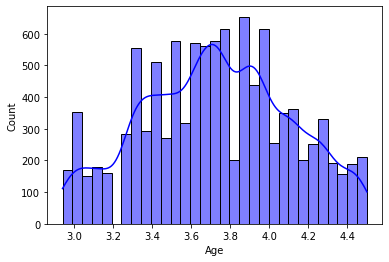

In [8]:
#log the age variable to have this more normal distribuited:
log_data = select_data[['Age']].apply(np.log1p, axis = 1).round(2)
#Check the Age distribution after the log:
fig = sns.histplot(log_data.Age, label = 'Age', color='blue', kde=True)

In [9]:
#normalize all the variables with StandardScaler
scaler = StandardScaler()
#Store it separately for clustering
scaled_data = scaler.fit_transform(select_data)
#save the results as a dataframe and change the columns names:
scaled_data = pd.DataFrame(scaled_data).rename({0:'Gender',
                                                1:'Ever_Married',
                                                2:'Age',
                                                3:'Graduated',
                                                4:'Spending_Score'}, axis=1)
#check the output:
scaled_data

,Gender,Ever_Married,Age,Graduated,Spending_Score,5,6
0,1.099333,0.825451,-0.448756,0.775908,-0.795075,-0.734665,-1.194594
1,-0.909642,0.825451,-0.389108,0.775908,1.686968,0.615845,0.785374
2,1.099333,0.825451,1.519618,-1.288813,-0.795075,-0.734665,-1.194594
3,-0.909642,0.825451,0.923141,-1.288813,2.617734,1.966355,-0.534605
4,1.099333,-1.211459,-1.462767,-1.288813,-0.174565,-0.734665,0.785374
...,...,...,...,...,...,...,...
10554,-0.909642,-1.211459,-1.283824,-1.288813,-0.795075,-0.734665,2.765343
10555,-0.909642,-1.211459,-0.508404,-1.288813,0.135691,-0.734665,0.785374
10556,1.099333,-1.211459,-0.627699,0.775908,-0.484820,-0.734665,-1.194594
10557,1.099333,-1.211459,-0.985585,0.775908,-0.484820,-0.734665,0.785374


## Kmeans model

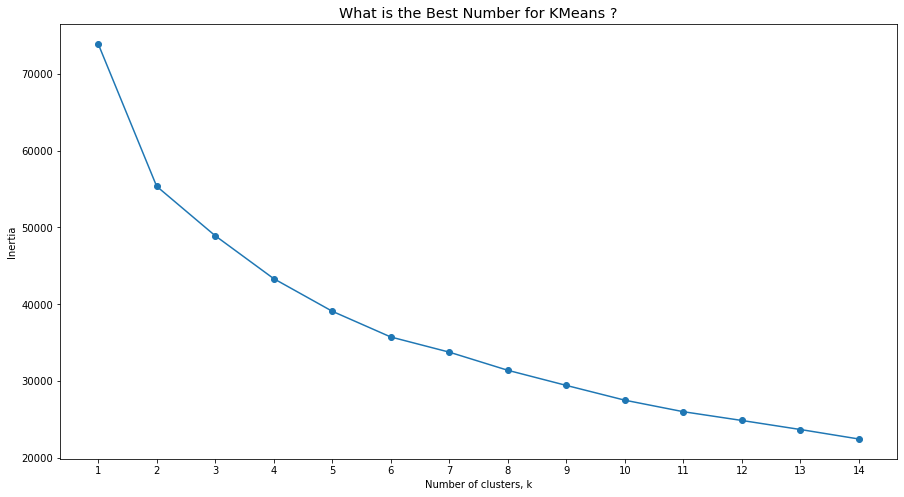

In [10]:
#choose the k value that will delivery the best number of clusters:
inertia =[]
k = range(1,15)

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=7).fit(scaled_data)
    inertia.append(kmeans.inertia_)

##Chart showing the k verus inertia
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(k, inertia, '-o')

plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [11]:
#find the elbow point
from kneed import KneeLocator 
elbow_point = KneeLocator(k, inertia, curve="convex", direction="decreasing")
print('The elbow point of your model is:', elbow_point.elbow)

The elbow point of your model is: 5


In [12]:
#use the elbow point value to determinate the number of clusters
kmeans = KMeans(n_clusters=5,max_iter=400, random_state=42).fit(scaled_data)
#assing each label to an index of the sacaled dataframe
customer_df['segmentation'] = kmeans.labels_
customer_df = np.round(customer_df,0)
customer_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,segmentation
0,458989,1,1,36,1,Engineer,0,0,1,Cat_6,3
1,458994,0,1,37,1,Healthcare,8,1,4,Cat_6,0
2,458996,1,1,69,0,Artist,0,0,1,Cat_6,4
3,459000,0,1,59,0,Executive,11,2,2,Cat_6,4
4,459001,1,0,19,0,Marketing,2,0,4,Cat_6,1
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,0,Artist,0,0,7,Cat_1,1
8064,464685,0,0,35,0,Executive,3,0,4,Cat_4,1
8065,465406,1,0,33,1,Healthcare,1,0,1,Cat_6,3
8066,467299,1,0,27,1,Healthcare,1,0,4,Cat_6,3


In [13]:
def percentage_by_segment(data, column,new_df):
    
    ''' Function to create a new data frame grouping the data by segment and another column 
    of the dataset. Then calculate the percentage of it by segment.
    data = dataframe
    column = name of the column you wanna group by segment
    new_df = name of the new data frame'''
    
    new_df = data.groupby(['segmentation', column])[column].count()
    new_df = round(new_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())), 2)
    new_df = pd.DataFrame(new_df)
    new_df  = new_df.rename(columns={'segmentation': 'segmentation',
                   column: column,
                   column: 'Percentage'}).reset_index() 
    return new_df

def high_percentage(new_df):
    
    """ Fucntion to get the variable with the high percentage by segment
    new_df =  the new dataframe """
    
    seg_1 = new_df.loc[new_df['segmentation'] == 0].sort_values('Percentage', ascending=False)
    print(seg_1.head(1))
    print("------------------------------")
    seg_2 = new_df.loc[new_df['segmentation'] == 1].sort_values('Percentage', ascending=False)
    print(seg_2.head(1))
    print("------------------------------")
    seg_3 = new_df.loc[new_df['segmentation'] == 2].sort_values('Percentage', ascending=False)
    print(seg_3.head(1))
    print("------------------------------")
    seg_4 = new_df.loc[new_df['segmentation'] == 3].sort_values('Percentage', ascending=False)
    print(seg_4.head(1))
    print("------------------------------")
    seg_5 = new_df.loc[new_df['segmentation'] == 4].sort_values('Percentage', ascending=False)
    print(seg_5.head(1))
    return

In [14]:
score_grouped = percentage_by_segment(customer_df,'Spending_Score','new_score')
high_percentage(score_grouped)

   segmentation  Spending_Score  Percentage
0             0               0       71.75
------------------------------
   segmentation  Spending_Score  Percentage
3             1               0       99.65
------------------------------
   segmentation  Spending_Score  Percentage
6             2               1       43.96
------------------------------
   segmentation  Spending_Score  Percentage
8             3               0       100.0
------------------------------
    segmentation  Spending_Score  Percentage
10             4               1       36.15


In [15]:
gender_grouped = percentage_by_segment(customer_df,'Gender','new_gender')
high_percentage(gender_grouped)

   segmentation  Gender  Percentage
1             0       1       56.29
------------------------------
   segmentation  Gender  Percentage
2             1       0       57.79
------------------------------
   segmentation  Gender  Percentage
4             2       0       59.81
------------------------------
   segmentation  Gender  Percentage
7             3       1       59.74
------------------------------
   segmentation  Gender  Percentage
8             4       0       64.65


In [16]:
profession_grouped = percentage_by_segment(customer_df,'Profession','new_profession')
high_percentage(profession_grouped)

   segmentation Profession  Percentage
0             0     Artist       38.03
------------------------------
    segmentation  Profession  Percentage
14             1  Healthcare       53.43
------------------------------
    segmentation Profession  Percentage
18             2     Artist       48.54
------------------------------
    segmentation Profession  Percentage
27             3     Artist        36.7
------------------------------
    segmentation Profession  Percentage
40             4  Executive       19.88


In [17]:
graduated_grouped = percentage_by_segment(customer_df,'Graduated','new_graduated')
high_percentage(graduated_grouped)

   segmentation  Graduated  Percentage
1             0          1       78.15
------------------------------
   segmentation  Graduated  Percentage
2             1          0       93.09
------------------------------
   segmentation  Graduated  Percentage
4             2          1       100.0
------------------------------
   segmentation  Graduated  Percentage
6             3          1       91.75
------------------------------
   segmentation  Graduated  Percentage
7             4          0       100.0


In [18]:
experience_grouped = percentage_by_segment(customer_df,'Work_Experience','new_work_experience')
high_percentage(experience_grouped)

   segmentation  Work_Experience  Percentage
5             0                9       33.07
------------------------------
    segmentation  Work_Experience  Percentage
11             1                0        32.5
------------------------------
    segmentation  Work_Experience  Percentage
26             2                1       37.01
------------------------------
    segmentation  Work_Experience  Percentage
35             3                0       34.09
------------------------------
    segmentation  Work_Experience  Percentage
42             4                0       33.27


In [19]:
age_grouped = percentage_by_segment(customer_df,'Age','new_age')
high_percentage(age_grouped)

    segmentation  Age  Percentage
16             0   36        5.68
------------------------------
    segmentation  Age  Percentage
59             1   19        8.41
------------------------------
     segmentation  Age  Percentage
121             2   50        4.23
------------------------------
     segmentation  Age  Percentage
173             3   33        5.23
------------------------------
     segmentation  Age  Percentage
245             4   43        3.49


In [20]:
family_grouped = percentage_by_segment(customer_df,'Family_Size','new_family')
high_percentage(family_grouped)

   segmentation  Family_Size  Percentage
1             0            2       40.51
------------------------------
    segmentation  Family_Size  Percentage
12             1            4       29.39
------------------------------
    segmentation  Family_Size  Percentage
19             2            2       44.15
------------------------------
    segmentation  Family_Size  Percentage
27             3            1       46.79
------------------------------
    segmentation  Family_Size  Percentage
34             4            2       40.06
